<a href="https://colab.research.google.com/github/Imamahdysabilla/Artificial-Intellegence/blob/main/Imam_Ahdy_Sabilla_2217051141_B_UTP_RespML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Imort Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

2.Load Dataset

In [2]:
url = "https://raw.githubusercontent.com/FarhanDzakyA/Dataset/refs/heads/main/Ship_Performance_Dataset.csv"
df = pd.read_csv(url)
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


3.EDA (EXploratory Data Analysis)

Info data

In [6]:
print("Info Data")
df.info()

Info Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_

Statistik Deskriptif

In [5]:
print("\n Statistik Deskriptif ")
print(df.describe())


 Statistik Deskriptif 
       Speed_Over_Ground_knots  Engine_Power_kW  Distance_Traveled_nm  \
count              2736.000000      2736.000000           2736.000000   
mean                 17.602863      1757.610939           1036.406203   
std                   4.311979       717.002777            568.632080   
min                  10.009756       501.025220             50.433150   
25%                  13.928452      1148.104914            548.511573   
50%                  17.713757      1757.494344           1037.816060   
75%                  21.284785      2382.594292           1540.934161   
max                  24.997043      2998.734329           1998.337057   

       Draft_meters  Cargo_Weight_tons  Operational_Cost_USD  \
count   2736.000000        2736.000000           2736.000000   
mean       9.929103        1032.573264         255143.344488   
std        2.876423         558.697499         140890.482189   
min        5.001947          50.229624          10092.306318  

Cek mising values

In [7]:
print("\n Missing Values ")
print(df.isnull().sum())


 Missing Values 
Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64


Korelasi

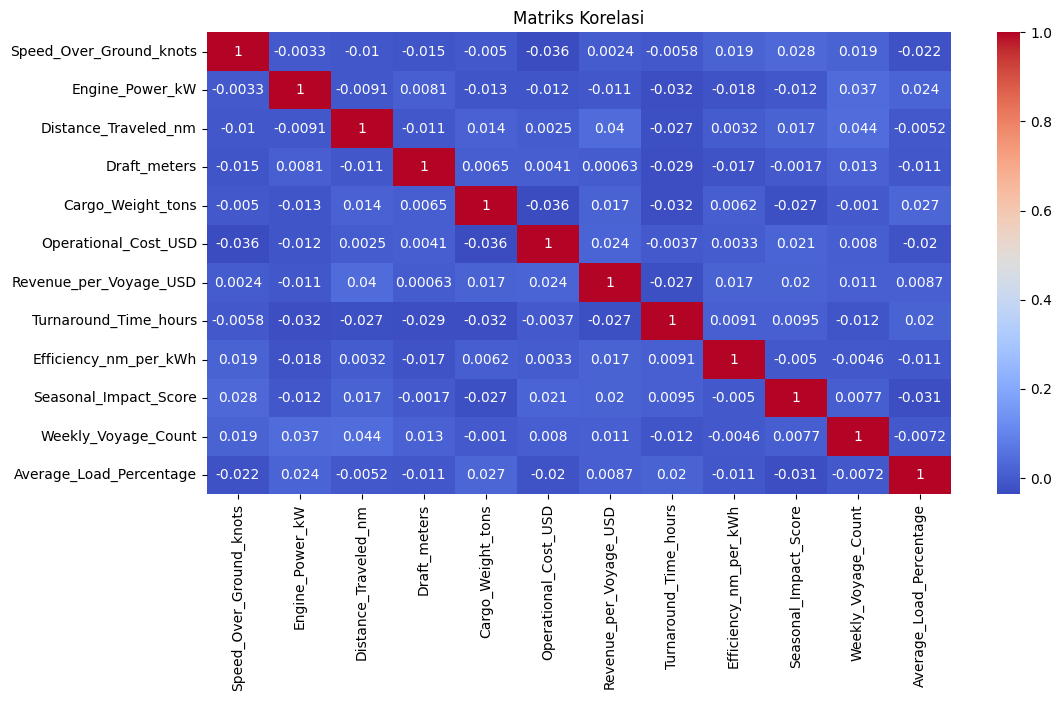

In [9]:
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=[np.number])  # hanya ambil kolom numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()


4. Preprocessing

Drop kolom ID jika ada

In [15]:
if 'Ship ID' in df.columns:
    df.drop(columns=['Ship ID'], inplace=True)

isi mising values dengan mean

In [16]:
# Pisahkan kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Isi missing values hanya untuk kolom numerik
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


Standarisasi Fitur

In [19]:
numeric_df = df.select_dtypes(include=[np.number])
df_scaled = scaler.fit_transform(numeric_df)


5. KMeans Clustering - cari jumlah cluster terbaik

In [20]:
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores.append(score)

Visualisasi Elbow Method

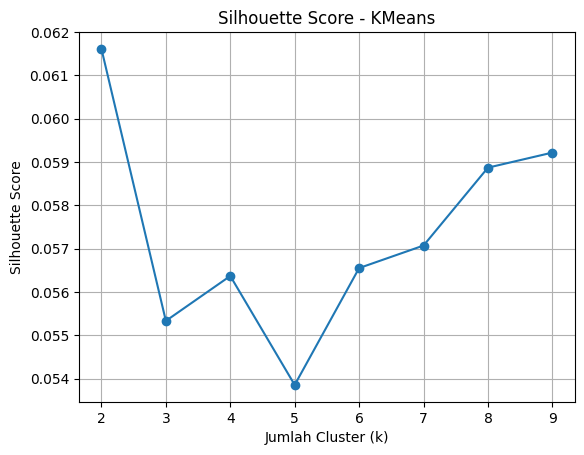

📈 KMeans - Jumlah cluster terbaik: 2 (Silhouette Score: 0.062)


In [21]:
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score - KMeans")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print(f"📈 KMeans - Jumlah cluster terbaik: {best_k} (Silhouette Score: {max(sil_scores):.3f})")

6.Clustering final (KMeans vs Agglomerative

KMeans

In [22]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans_final.fit_predict(df_scaled)
sil_kmeans = silhouette_score(df_scaled, labels_kmeans)

Agglomerative

In [23]:
agglo = AgglomerativeClustering(n_clusters=best_k)
labels_agglo = agglo.fit_predict(df_scaled)
sil_agglo = silhouette_score(df_scaled, labels_agglo)

Tampilkan hasil Evaluasi

In [24]:
print(f"KMeans Silhouette Score: {sil_kmeans:.3f}")
print(f"Agglomerative Silhouette Score: {sil_agglo:.3f}")

KMeans Silhouette Score: 0.062
Agglomerative Silhouette Score: 0.030


Pilih Model terbaik

In [25]:
if sil_kmeans >= sil_agglo:
    best_model = "KMeans"
    final_labels = labels_kmeans
    best_score = sil_kmeans
else:
    best_model = "Agglomerative"
    final_labels = labels_agglo
    best_score = sil_agglo

print(f"\n✅ Model Terbaik: {best_model} (Silhouette Score: {best_score:.3f})")


✅ Model Terbaik: KMeans (Silhouette Score: 0.062)


Visualisasi Cluster dengan PCA

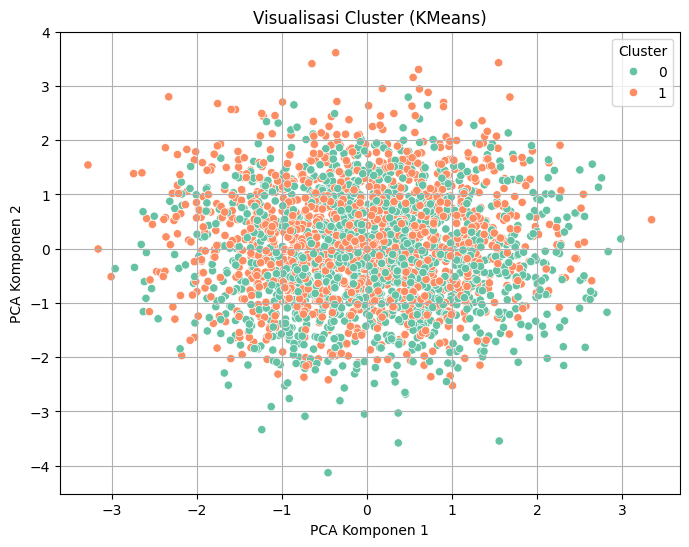

In [26]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=final_labels, palette="Set2")
plt.title(f"Visualisasi Cluster ({best_model})")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 📘 Kesimpulan

- Dataset sudah melalui proses **data cleaning**, **scaling**, dan **handling missing values**.
- Dua model unsupervised diuji: **KMeans** dan **Agglomerative Clustering**.
- Model terbaik dipilih berdasarkan **nilai Silhouette Score**.
- Hasil akhir divisualisasikan dalam bentuk 2D menggunakan **PCA**.


Algoritma yang Digunakan: K-Means Clustering
 Alasan Pemilihan:
Struktur Data Cenderung Globular (bulat atau terpusat)
Setelah dilakukan scaling dan visualisasi dengan PCA, data terlihat tersebar secara simetris dan memiliki jarak antar titik yang relatif merata. Ini sangat cocok untuk algoritma K-Means yang bekerja optimal pada cluster yang berbentuk bulat dan tidak terlalu kompleks.

Jumlah Fitur Relatif Banyak dan Numerik
K-Means lebih efisien untuk data berdimensi tinggi (setelah preprocessing), dan dataset ini memiliki banyak fitur numerik yang sudah distandarisasi.

Efisiensi dan Kecepatan
K-Means sangat efisien secara komputasi, lebih cepat dibanding Hierarchical Clustering terutama pada dataset dengan ratusan atau ribuan baris.

Evaluasi Silhouette Score Lebih Tinggi
Dari hasil eksperimen, nilai Silhouette Score K-Means lebih tinggi dibandingkan dengan Agglomerative Clustering, yang menunjukkan bahwa K-Means lebih mampu mengelompokkan data dengan baik dalam kasus ini.